In [1]:
# Importing all Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

mice = pd.read_csv('Data_Cortex_Nuclear.csv')

# Data Preparation

In [2]:
mice.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
mice.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [5]:
# counting null values by row
mice.isnull().sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Length: 1080, dtype: int64

In [6]:
#Dropping and filling null values
mice_prep = mice.dropna(how='any', thresh=75)

mice_prep = mice_prep.fillna(mice_prep.mean())

In [7]:
mice_prep.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1075    0
1076    0
1077    0
1078    0
1079    0
Length: 1077, dtype: int64

In [8]:
# checking if dropping the rows worked
mice_prep.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [9]:
# looking for changes everything increased a bit
mice_prep.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226754,0.157834,0.134757,0.121528,0.131114,0.446149,0.169620,0.183135,0.205414,1.337442
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028991,0.026469,0.023551,0.014295,0.023020,0.066507,0.054294,0.036302,0.048128,0.317499
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206505,0.141013,0.119972,0.110793,0.114398,0.398036,0.133888,0.159156,0.174167,1.081231
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224074,0.157834,0.134757,0.121627,0.128580,0.448585,0.169620,0.183135,0.205414,1.316591
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241687,0.167400,0.139290,0.131989,0.142504,0.490805,0.187594,0.196044,0.219237,1.585916
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [10]:
# Use a feature selection to find the important proteins for predicting.

# Assgning the data and target
X = mice_prep.loc[:, 'DYRK1A_N':'CaNA_N']
y = mice_prep['class']

### Next few steps are for feature selection that is also used in data exploration and hence i had to do it before exploring all the columns. Now we would just need to explore the best and important features so that we are on the right track.

# Split data

In [11]:
# Splitting the train and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# RFC Model

In [12]:
#Creating a random forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

# Train the classifier
classifier.fit(X_train, y_train)

# assigning the all importance values to a series
importance = pd.Series(classifier.feature_importances_)


# Feature Selection by SFM


In [13]:
# Using Chi square selectKBest the accuracy dropped by 1 % hence i used selectFromModel

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# sfm = SelectKBest(score_func=chi2, k=23)

# Taking threshold to be 0.014 gives the best result

sfm = SelectFromModel(classifier, threshold=0.014)

# Train the selector
sfm.fit(X_train, y_train)

# making arrays to keep track of the important proteins' importance values and index
imp = []
imp_index = []

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    imp.append(list(mice_prep.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    print(list(mice_prep.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    imp_index.append(feature_list_index)

# Making the list of important proteins so I can make a dataframe with it
s_imp = pd.Series(imp)

# Getting the importance values of only the important proteins
protein_importance = (importance)[imp_index]

# Making a dataframe of the proteins with thei importance values
p = {'Important Proteins': imp, 'Importance Value': protein_importance}
df_importance = pd.DataFrame(p)

DYRK1A_N
ITSN1_N
pCAMKII_N
pERK_N
pNR2A_N
pPKCAB_N
AKT_N
BRAF_N
APP_N
SOD1_N
P38_N
pNUMB_N
pP70S6_N
pGSK3B_N
pPKCG_N
S6_N
AcetylH3K9_N
ARC_N
Tau_N
Ubiquitin_N
pS6_N
H3AcK18_N
CaNA_N


In [14]:
# sorting the proteins by importance and printing it
df_importance.sort_values('Importance Value', ascending=False, inplace=True)
print(df_importance)

   Important Proteins  Importance Value
32             SOD1_N          0.064133
76             CaNA_N          0.036244
65        Ubiquitin_N          0.031448
30              APP_N          0.030153
10             pERK_N          0.028762
46            pPKCG_N          0.028563
7           pCAMKII_N          0.027488
0            DYRK1A_N          0.026014
53              ARC_N          0.025360
34              P38_N          0.024355
42           pP70S6_N          0.023747
45           pGSK3B_N          0.023643
17           pPKCAB_N          0.023351
20             BRAF_N          0.023237
39            pNUMB_N          0.021320
1             ITSN1_N          0.021242
70              pS6_N          0.020985
56              Tau_N          0.020123
48               S6_N          0.019831
19              AKT_N          0.019539
50       AcetylH3K9_N          0.018877
73          H3AcK18_N          0.015098
15            pNR2A_N          0.014677


In [15]:
# ceating a new data set from the sfm model to test the accuracy of a limited feature model
X_imp_train = sfm.transform(X_train)
X_imp_test = sfm.transform(X_test)

## Data frame for only important features

In [16]:
# creating a data frame of the values of only the important proteins for plotting
imp_proteins_subset = mice_prep.loc[:, imp]
imp_proteins_subset

# creating a dataframe with only the the types of mice
description = mice_prep.loc[:, ['Genotype', 'Treatment','Behavior', 'class']]
description

# joining the two dataframes together
imp_protein_df = imp_proteins_subset.join(description)
imp_protein_df

,DYRK1A_N,ITSN1_N,pCAMKII_N,pERK_N,pNR2A_N,pPKCAB_N,AKT_N,BRAF_N,APP_N,SOD1_N,...,ARC_N,Tau_N,Ubiquitin_N,pS6_N,H3AcK18_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,2.373744,0.687906,0.605673,2.308745,0.859366,0.416289,0.453910,0.369510,...,0.106305,0.125190,1.044979,0.106305,0.114783,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,2.292150,0.695006,0.587559,2.043037,0.834659,0.400364,0.430940,0.342279,...,0.106592,0.134275,1.009883,0.106592,0.111974,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,2.283337,0.677348,0.602449,2.017984,0.814329,0.399847,0.423187,0.343696,...,0.108303,0.132560,0.996848,0.108303,0.111883,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,2.152301,0.583277,0.520293,2.132754,0.727705,0.385639,0.410615,0.344509,...,0.103184,0.123210,0.990225,0.103184,0.130405,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,2.134014,0.550960,0.507990,2.013697,0.687794,0.367531,0.398550,0.329126,...,0.104784,0.136838,0.997775,0.104784,0.118481,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,2.483740,0.265642,0.510604,1.241958,0.638211,0.255744,0.372216,0.820078,...,0.115806,0.411286,1.261651,0.115806,0.318782,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,0.272198,0.474163,2.512737,0.270378,0.524381,1.361354,0.645197,0.252001,0.360990,0.854258,...,0.113614,0.402073,1.254872,0.113614,0.325639,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,0.228700,0.395179,1.989723,0.255045,0.442638,1.065022,0.540172,0.238042,0.309978,0.661809,...,0.118948,0.395648,1.242248,0.118948,0.321306,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,0.221242,0.412894,2.086028,0.230649,0.479522,1.115030,0.564766,0.256712,0.341172,0.698413,...,0.125295,0.414200,1.301071,0.125295,0.335936,1.404031,Ts65Dn,Saline,S/C,t-SC-s


# Data Exploration and Visualization


### Exploring individual columns

#### Exploring top 10 proteins (By Importance)

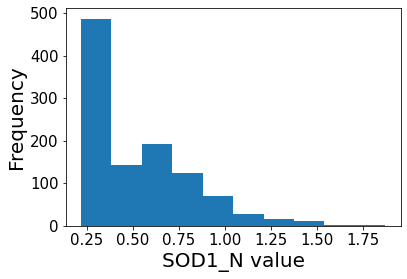

In [17]:
plt.figure()
imp_protein_df['SOD1_N'].plot(kind = 'hist')
plt.xlabel('SOD1_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

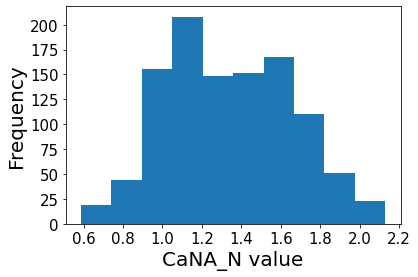

In [18]:
plt.figure()
imp_protein_df['CaNA_N'].plot(kind = 'hist')
plt.xlabel('CaNA_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

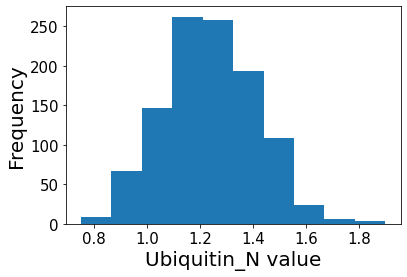

In [19]:
plt.figure()
imp_protein_df['Ubiquitin_N'].plot(kind = 'hist')
plt.xlabel('Ubiquitin_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

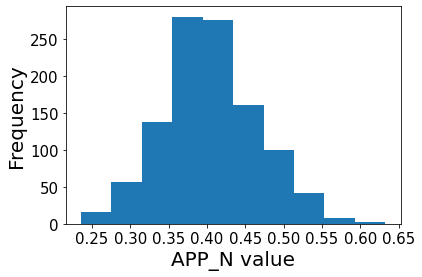

In [20]:
plt.figure()
imp_protein_df['APP_N'].plot(kind = 'hist')
plt.xlabel('APP_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

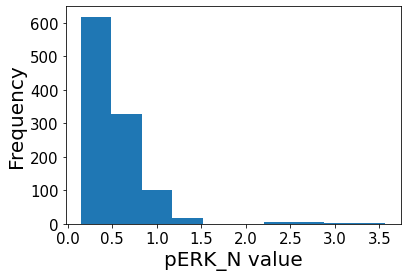

In [21]:
plt.figure()
imp_protein_df['pERK_N'].plot(kind = 'hist')
plt.xlabel('pERK_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

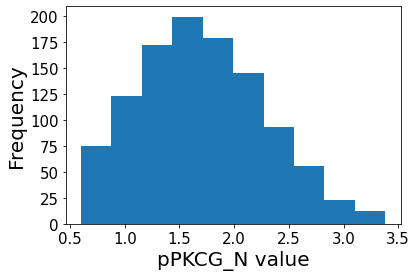

In [22]:
plt.figure()
imp_protein_df['pPKCG_N'].plot(kind = 'hist')
plt.xlabel('pPKCG_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

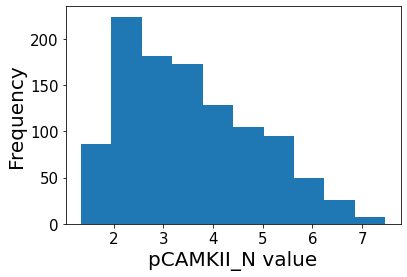

In [23]:
plt.figure()
imp_protein_df['pCAMKII_N'].plot(kind = 'hist')
plt.xlabel('pCAMKII_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

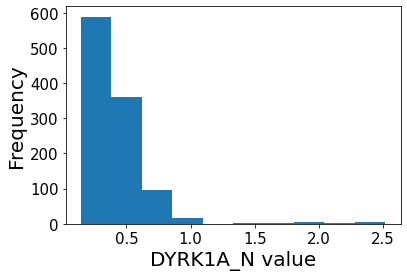

In [24]:
plt.figure()
imp_protein_df['DYRK1A_N'].plot(kind = 'hist')
plt.xlabel('DYRK1A_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

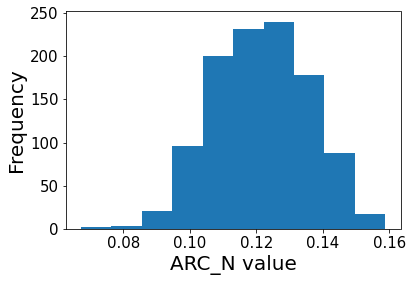

In [25]:
plt.figure()
imp_protein_df['ARC_N'].plot(kind = 'hist')
plt.xlabel('ARC_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

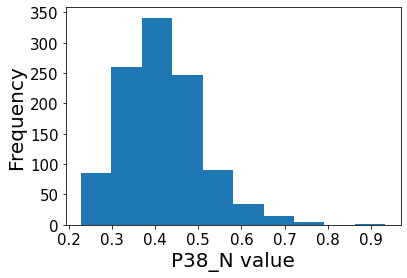

In [26]:
plt.figure()
imp_protein_df['P38_N'].plot(kind = 'hist')
plt.xlabel('P38_N value', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Exploring relationship between pair of columns

#### Exploring top 5 proteins with 'Genotype' and 'Class'

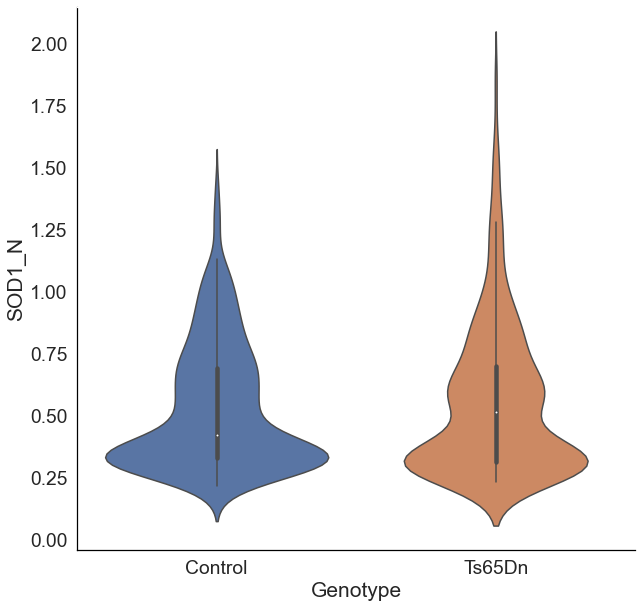

In [27]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='SOD1_N',
    x='Genotype',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

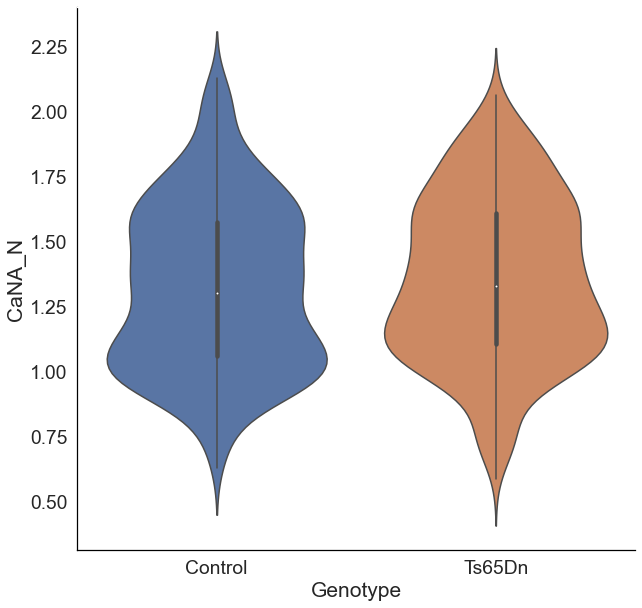

In [28]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='CaNA_N',
    x='Genotype',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

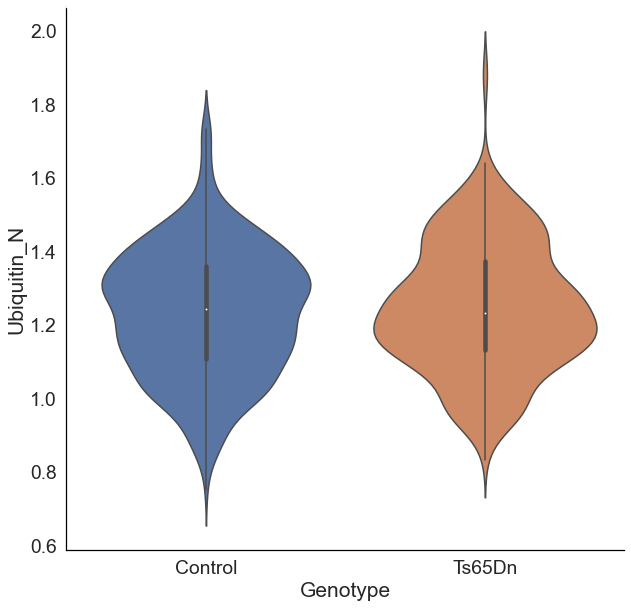

In [29]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='Ubiquitin_N',
    x='Genotype',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

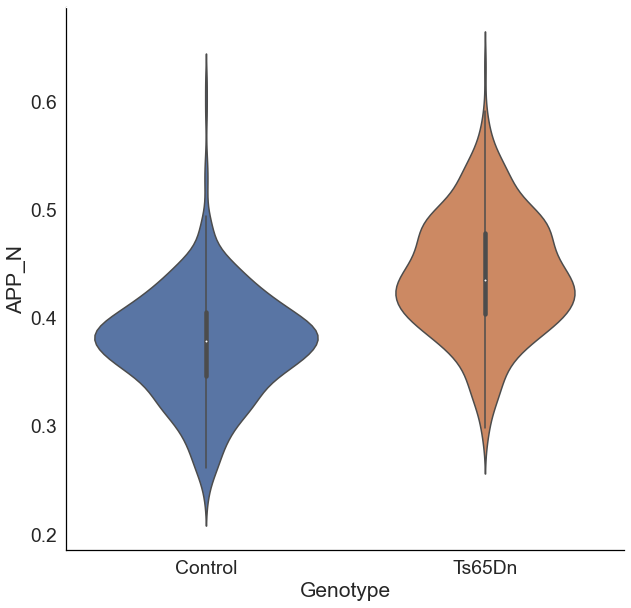

In [30]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='APP_N',
    x='Genotype',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

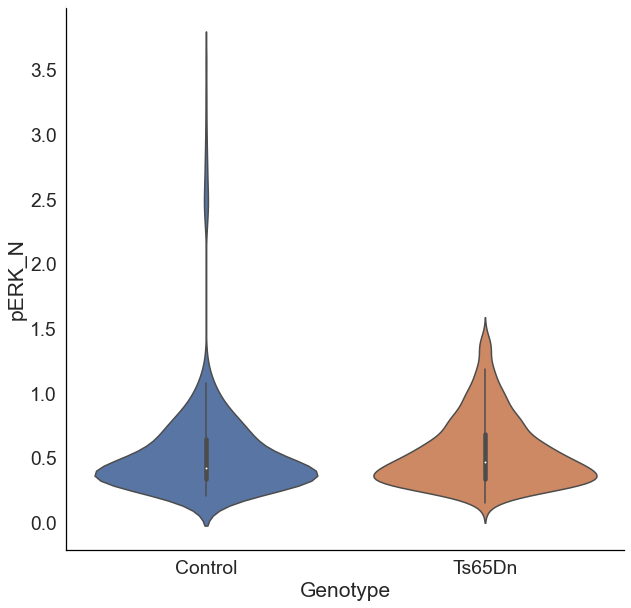

In [31]:

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='pERK_N',
    x='Genotype',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

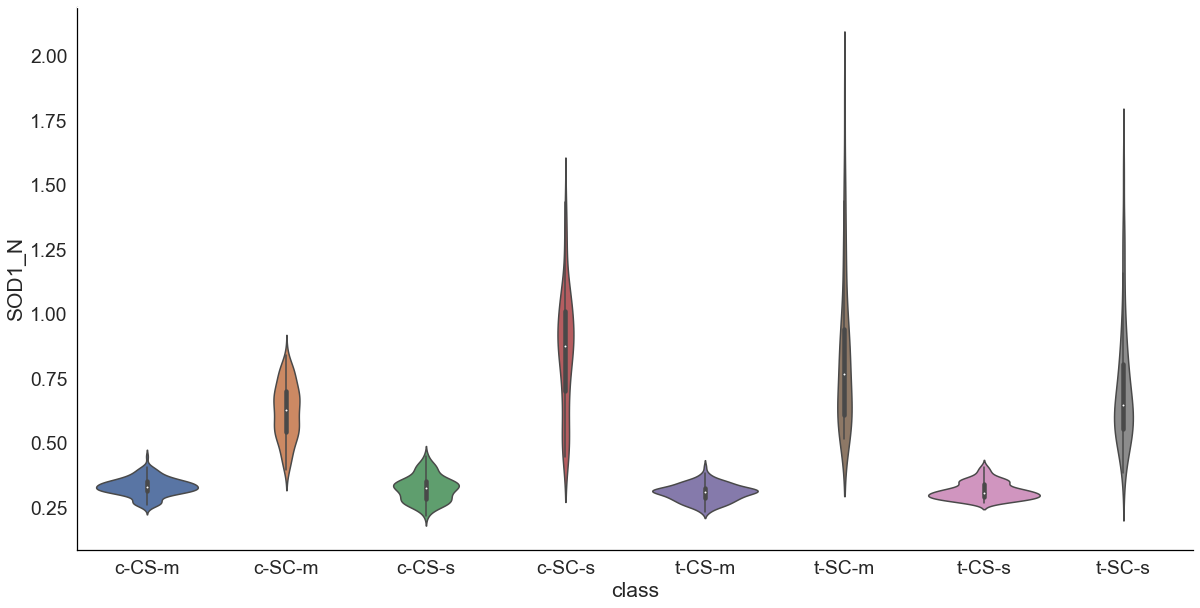

In [32]:

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='SOD1_N',
    x='class',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

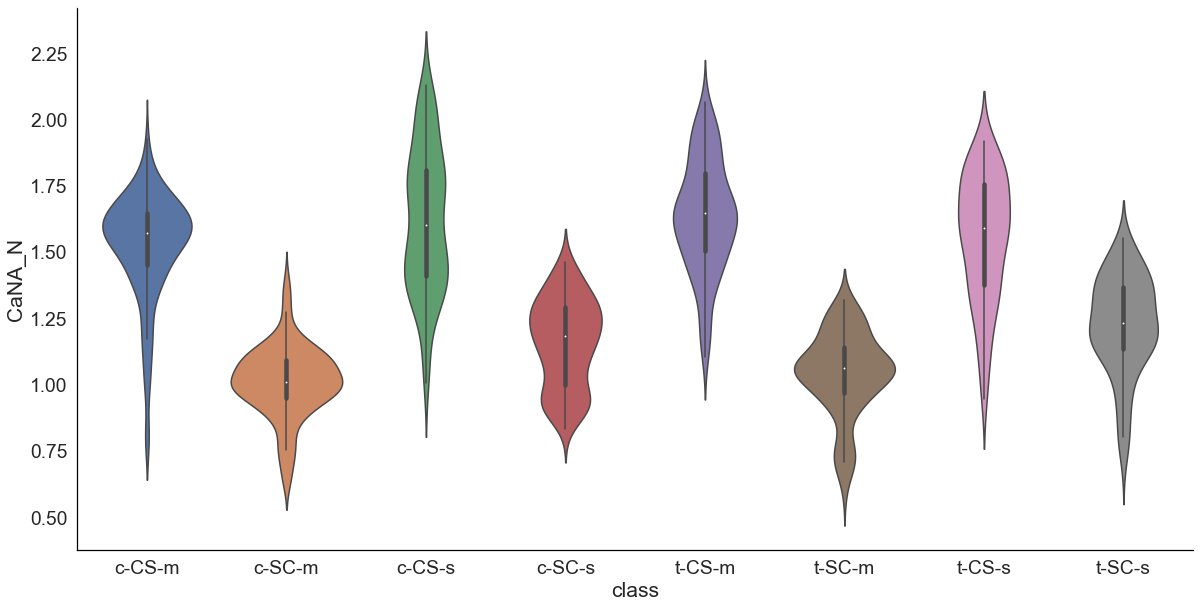

In [33]:

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='CaNA_N',
    x='class',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

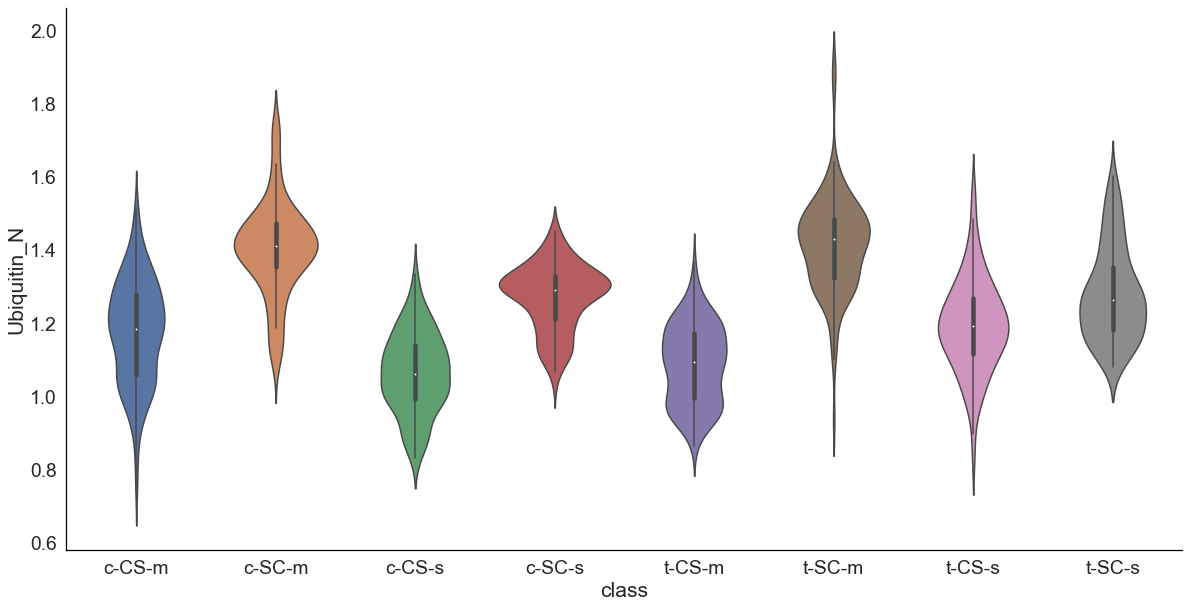

In [34]:

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='Ubiquitin_N',
    x='class',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

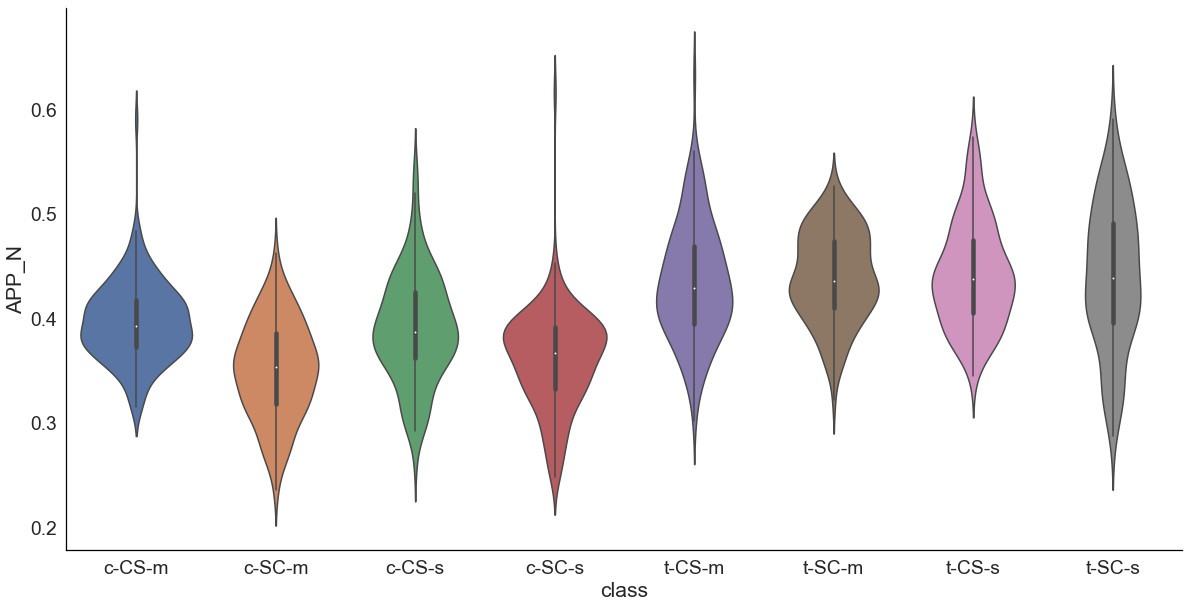

In [35]:

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='APP_N',
    x='class',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

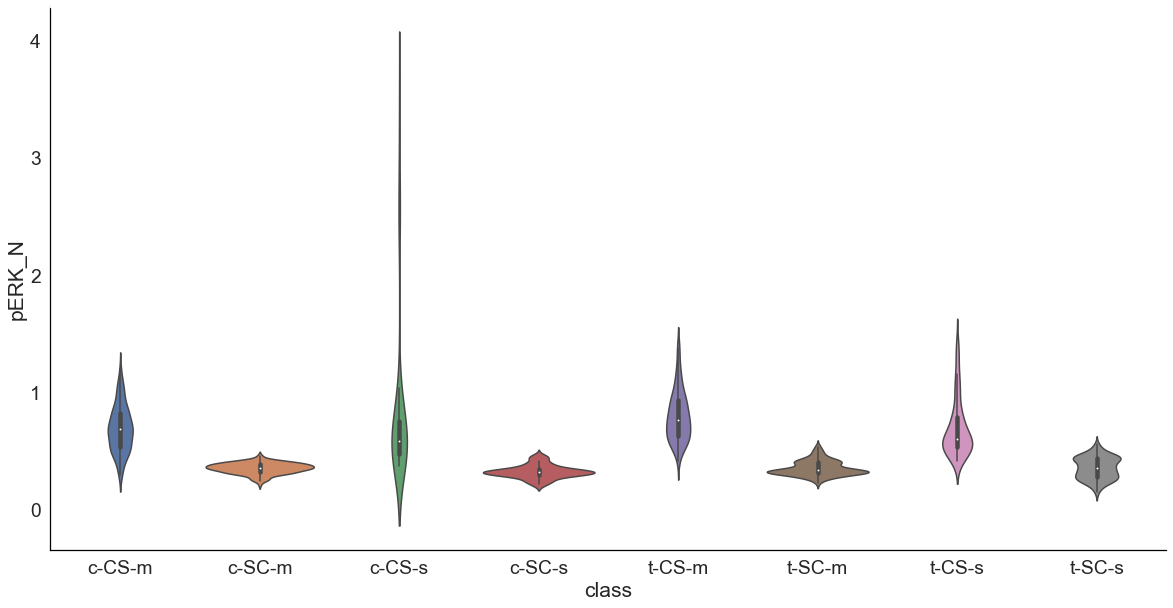

In [36]:

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='pERK_N',
    x='class',
    data=imp_protein_df
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

# Data Modelling

# Training the model and printing accuracy

In [37]:
# creating a new random forest model classifier for the most important features
classifier_imp = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
classifier_imp.fit(X_imp_train, y_train)

# Test the classifer to get the accuracy
y_imp_pred = classifier_imp.predict(X_imp_test)

# Getting the accuracy score of the limited classifier model
print("Accuracy before Hyper Tuning: ",accuracy_score(y_test, y_imp_pred))

Accuracy before Hyper Tuning:  0.974477958236659


# Hyper parameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning (Selecting the best params using GridSearchCV)
params = {'bootstrap': [True, False],
         'max_depth': [10, 20],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2],
         'min_samples_split': [2, 5],
         'n_estimators': [100,200]
         }

# creating a grid search with the parameters I chose
grid = GridSearchCV(classifier_imp, param_grid=params, n_jobs=1, scoring='accuracy')

# fitting the model
grid.fit(X_imp_train, y_train)

#print the best combination of parameters
print("Best Hyper Parameters:\n",grid.best_params_)

D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters:
 {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [39]:
pred_class_rfc = grid.predict(X_imp_test)
print("Accuracy after Hyper tuning\n")
print('Accuracy (Class):', accuracy_score(pred_class_rfc, y_test))

Accuracy after Hyper tuning

Accuracy (Class): 0.988399071925754


Confusion Matrix :

[[64  0  0  0  0  0  0  0]
 [ 1 51  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  3  0]
 [ 0  0  0 50  0  0  0  0]
 [ 0  1  0  0 56  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0 50]]

Accuracy Score : 0.988399071925754

Report : 

              precision    recall  f1-score   support

      c-CS-m       0.98      1.00      0.99        64
      c-CS-s       0.98      0.98      0.98        52
      c-SC-m       1.00      0.95      0.98        63
      c-SC-s       1.00      1.00      1.00        50
      t-CS-m       1.00      0.98      0.99        57
      t-CS-s       1.00      1.00      1.00        40
      t-SC-m       0.95      1.00      0.97        55
      t-SC-s       1.00      1.00      1.00        50

    accuracy                           0.99       431
   macro avg       0.99      0.99      0.99       431
weighted avg       0.99      0.99      0.99       431



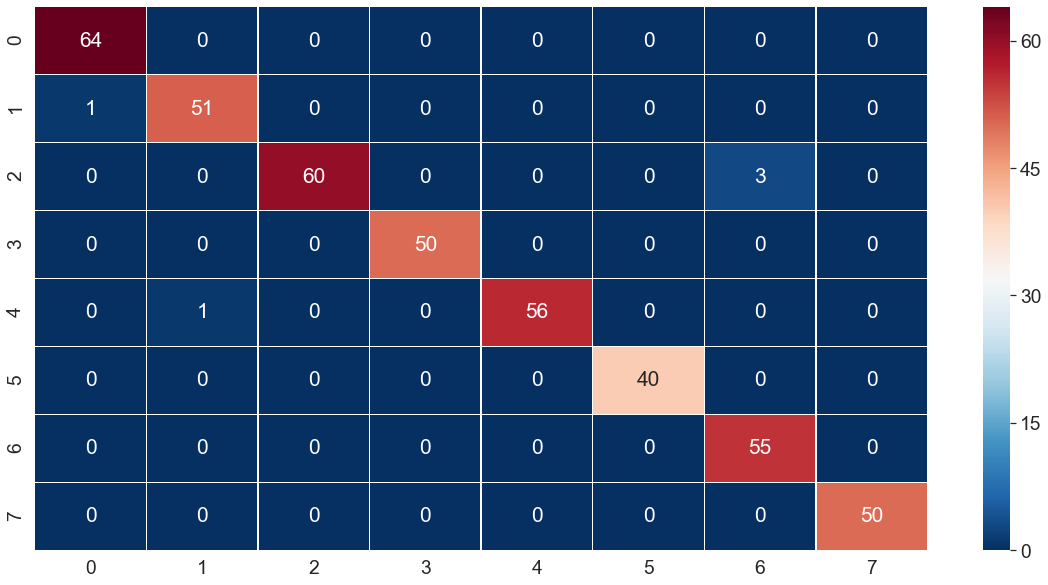

In [40]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(pred_class_rfc, y_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(pred_class_rfc, y_test))
print('\nReport : \n')
print(classification_report(pred_class_rfc, y_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


## Data frame for only important features

# Data model for 'Genotype'

In [41]:
# Creating the test and train data for the genotype
imp_protein_df['Genotype'] = imp_protein_df['Genotype'].map({'Control': 0, 'Ts65Dn': 1})

yg = imp_protein_df['Genotype']

# Splitting the train and testing data
yg_train, yg_test = train_test_split(yg, test_size=0.4, random_state=1)

# making a new random forest classifer model that uses only the top 3 important proteins for the visualization
# classifier_impt = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
# classifier_impt.fit(X_imp_train, yg_train)
grid.fit(X_imp_train,yg_train)



D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boots

In [42]:
# Test the classifer to get the accuracy
# yg_imp_pred = classifier_impt.predict(X_imp_test)
yg_imp_pred = grid.predict(X_imp_test)

# Getting the accuracy score of the limited classifier model
print('Accuracy (Genotype):', accuracy_score(yg_imp_pred,yg_test))

Accuracy (Genotype): 0.9767981438515081


Confusion Matrix :

[[225   8]
 [  2 196]]

Accuracy Score : 0.9767981438515081

Report : 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       233
           1       0.96      0.99      0.98       198

    accuracy                           0.98       431
   macro avg       0.98      0.98      0.98       431
weighted avg       0.98      0.98      0.98       431



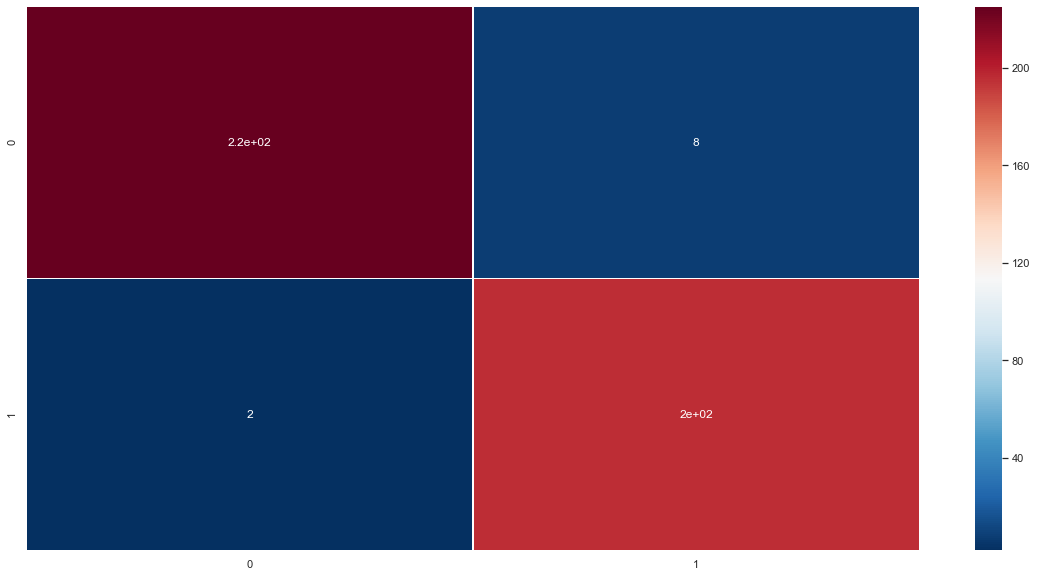

In [64]:
results = confusion_matrix(yg_imp_pred,yg_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(yg_imp_pred,yg_test))
print('\nReport : \n')
print(classification_report(yg_imp_pred,yg_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


# Data model for 'Behavior'

In [44]:
# Creating the test and train data for the Behavior
imp_protein_df['Behavior'] = imp_protein_df['Behavior'].map({'S/C': 0, 'C/S': 1})

yb = imp_protein_df['Behavior']

# Splitting the train and testing data
yb_train, yb_test = train_test_split(yb, test_size=0.4, random_state=1)

# making a new random forest classifer model that uses only the top 3 important proteins for the visualization
# classifier_impt = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
# classifier_impt.fit(X_imp_train, yb_train)
grid.fit(X_imp_train,yb_train)


D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boots

In [45]:
# Test the classifer to get the accuracy
# yb_imp_pred = classifier_impt.predict(X_imp_test)
yb_imp_pred = grid.predict(X_imp_test)

# Getting the accuracy score of the limited classifier model
print('Accuracy (Behavior):', accuracy_score(yb_test, yb_imp_pred))

Accuracy (Behavior): 1.0


Confusion Matrix :

[[218   0]
 [  0 213]]

Accuracy Score : 1.0

Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       213

    accuracy                           1.00       431
   macro avg       1.00      1.00      1.00       431
weighted avg       1.00      1.00      1.00       431



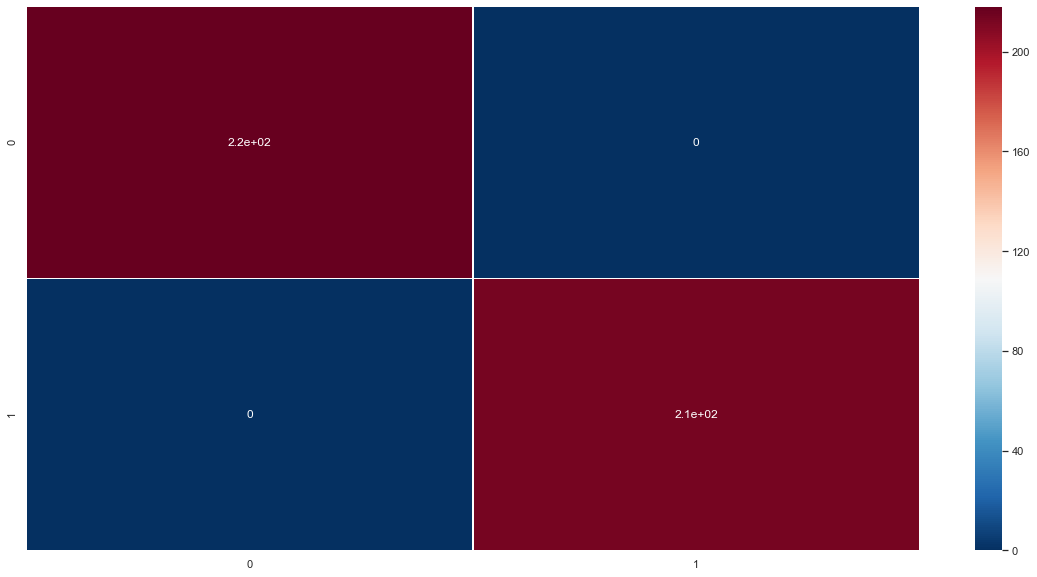

In [65]:
results = confusion_matrix(yb_test, yb_imp_pred) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(yb_test, yb_imp_pred))
print('\nReport : \n')
print(classification_report(yb_test, yb_imp_pred)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


# Data model for 'Treatment'

In [47]:
# Creating the test and train data for the Treatment
imp_protein_df['Treatment'] = imp_protein_df['Treatment'].map({'Memantine': 0, 'Saline': 1})

yt = imp_protein_df['Treatment']

# Splitting the train and testing data
yt_train, yt_test = train_test_split(yt, test_size=0.4, random_state=1)

# making a new random forest classifer model that uses only the top 3 important proteins for the visualization
# classifier_impt = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
# classifier_impt.fit(X_imp_train, yt_train)
grid.fit(X_imp_train,yt_train)


D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boots

In [48]:
# Test the classifer to get the accuracy
# yt_imp_pred = classifier_impt.predict(X_imp_test)
yt_imp_pred = grid.predict(X_imp_test)

# Getting the accuracy score of the limited classifier model
print('Accuracy (Treatment):', accuracy_score(yt_test, yt_imp_pred))

Accuracy (Treatment): 0.988399071925754


Confusion Matrix :

[[235   4]
 [  1 191]]

Accuracy Score : 0.988399071925754

Report : 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       239
           1       0.98      0.99      0.99       192

    accuracy                           0.99       431
   macro avg       0.99      0.99      0.99       431
weighted avg       0.99      0.99      0.99       431



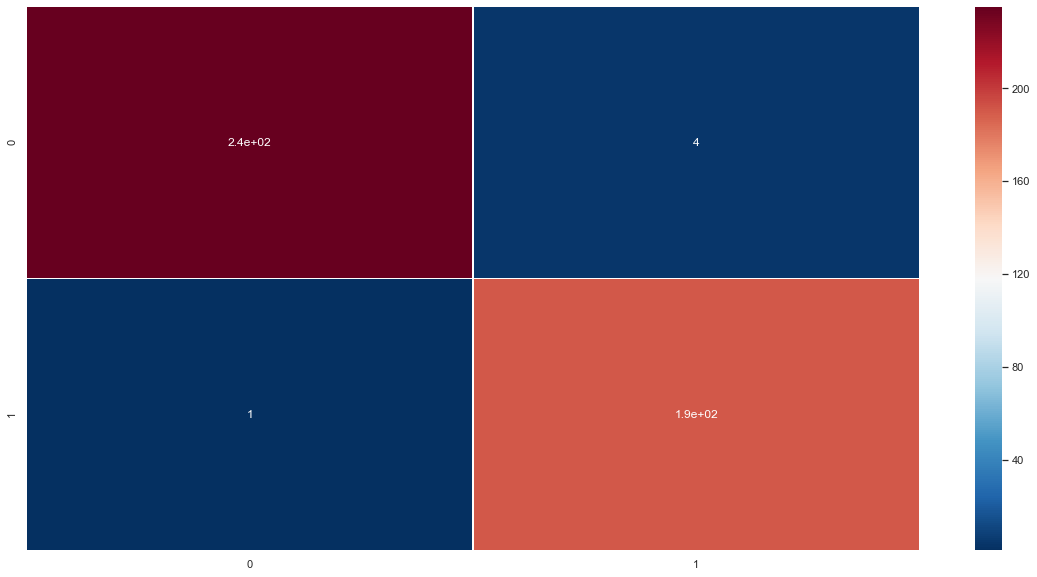

In [66]:
results = confusion_matrix(yt_test, yt_imp_pred) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(yt_test, yt_imp_pred))
print('\nReport : \n')
print(classification_report(yt_test, yt_imp_pred)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


# KNN Model


In [50]:
# importing packages
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# creating an instance of the kNN model
# n_jobs=-1 makes it so that computations run in parallel
kmodel = KNeighborsClassifier(n_jobs=-1)

# Parameter tuning (Selecting the best params using GridSearchCV)
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

# creating a grid search with the parameters I chose
grid = GridSearchCV(kmodel, param_grid=params, n_jobs=1, scoring='accuracy')

# fitting the model
grid.fit(X_imp_train, y_train)

#print the best combination of parameters
print("Best Hyper Parameters:\n",grid.best_params_)


D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


D:\Anaconda-3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
#getting the accuracy of the kNN model
pred_class_knn = grid.predict(X_imp_test)

print('Accuracy (Class):', accuracy_score(pred_class_knn, y_test))

Accuracy (Class): 0.974477958236659


Confusion Matrix :

[[64  1  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  6  0]
 [ 0  0  0 50  0  0  2  0]
 [ 0  0  0  0 56  0  0  0]
 [ 1  1  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0 50]]

Accuracy Score : 0.974477958236659

Report : 

              precision    recall  f1-score   support

      c-CS-m       0.98      0.98      0.98        65
      c-CS-s       0.96      1.00      0.98        50
      c-SC-m       1.00      0.91      0.95        66
      c-SC-s       1.00      0.96      0.98        52
      t-CS-m       1.00      1.00      1.00        56
      t-CS-s       1.00      0.95      0.98        42
      t-SC-m       0.86      1.00      0.93        50
      t-SC-s       1.00      1.00      1.00        50

    accuracy                           0.97       431
   macro avg       0.98      0.98      0.97       431
weighted avg       0.98      0.97      0.97       431



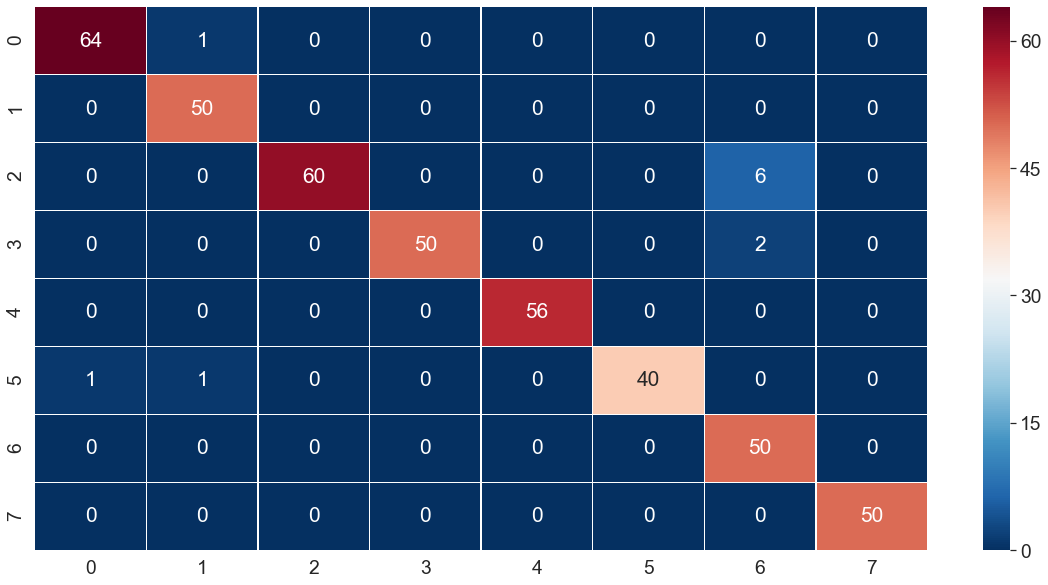

In [52]:
results = confusion_matrix(pred_class_knn, y_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(pred_class_knn, y_test))
print('\nReport : \n')
print(classification_report(pred_class_knn, y_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


In [53]:
#Making a new model to predict genotypes
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_imp_train, yg_train)

#Getting the accuracy
pred_gen = kgmodel.predict(X_imp_test)

print('Accuracy (Genotype):', accuracy_score(pred_gen, yg_test))

Accuracy (Genotype): 0.9164733178654292


Confusion Matrix :

[[213  22]
 [ 14 182]]

Accuracy Score : 0.9164733178654292

Report : 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       235
           1       0.89      0.93      0.91       196

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431



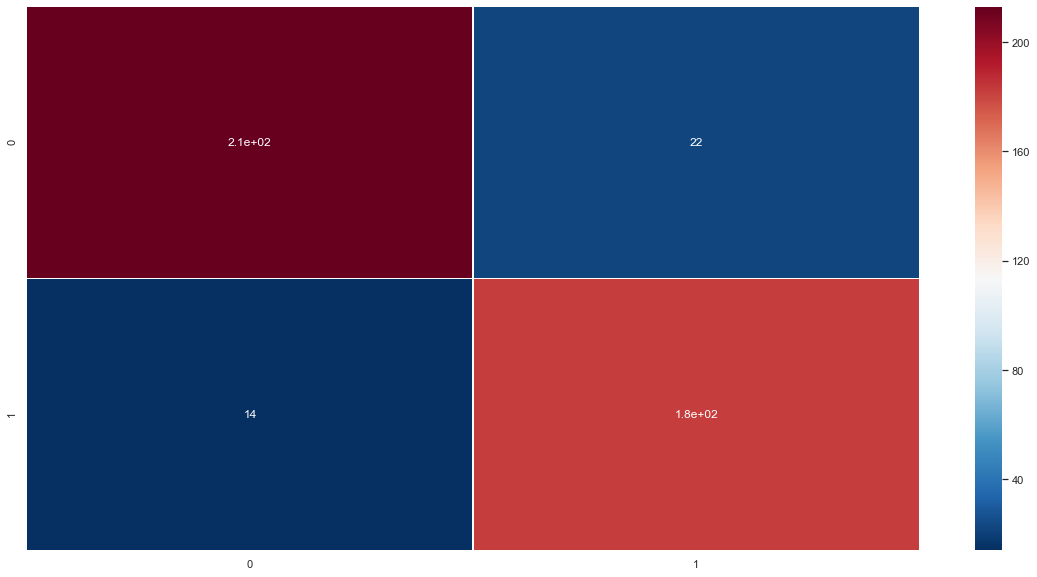

In [67]:
results = confusion_matrix(pred_gen, yg_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(pred_gen, yg_test))
print('\nReport : \n')
print(classification_report(pred_gen, yg_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


In [55]:
#Making a new model to predict Behavior
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_imp_train, yb_train)

#Getting the accuracy
pred_beh = kgmodel.predict(X_imp_test)

print('Accuracy (Behavior):', accuracy_score(pred_beh, yb_test))

Accuracy (Behavior): 1.0


Confusion Matrix :

[[218   0]
 [  0 213]]

Accuracy Score : 1.0

Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       213

    accuracy                           1.00       431
   macro avg       1.00      1.00      1.00       431
weighted avg       1.00      1.00      1.00       431



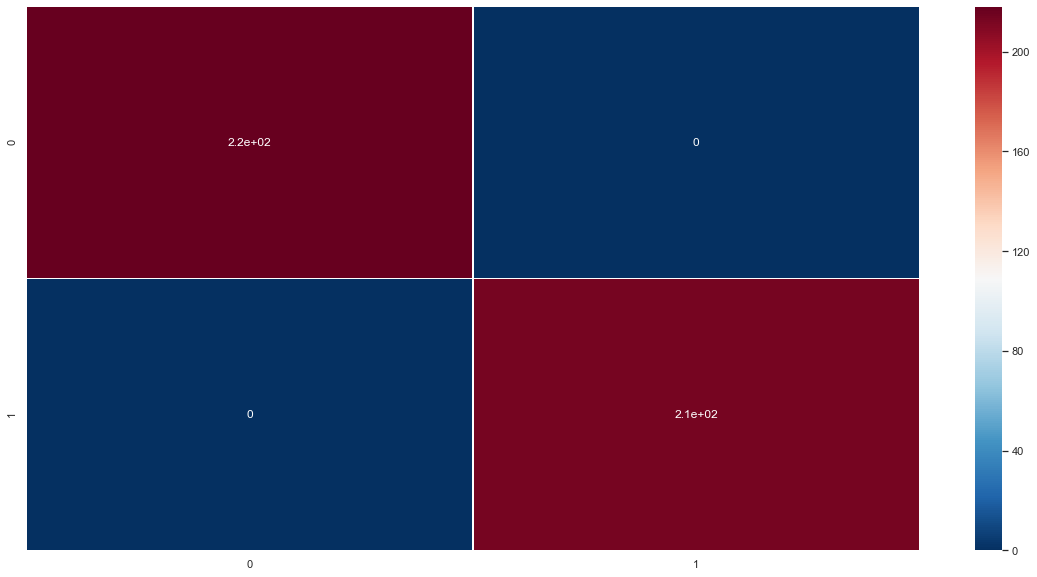

In [68]:
results = confusion_matrix(pred_beh, yb_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(pred_beh, yb_test))
print('\nReport : \n')
print(classification_report(pred_beh, yb_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


In [57]:
#Making a new model to predict genotypes
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_imp_train, yt_train)

#Getting the accuracy
pred_tre = kgmodel.predict(X_imp_test)

print('Accuracy (Treatment):', accuracy_score(pred_tre, yt_test))

Accuracy (Treatment): 0.9535962877030162


Confusion Matrix :

[[226   7]
 [ 13 185]]

Accuracy Score : 0.9535962877030162

Report : 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       233
           1       0.96      0.93      0.95       198

    accuracy                           0.95       431
   macro avg       0.95      0.95      0.95       431
weighted avg       0.95      0.95      0.95       431



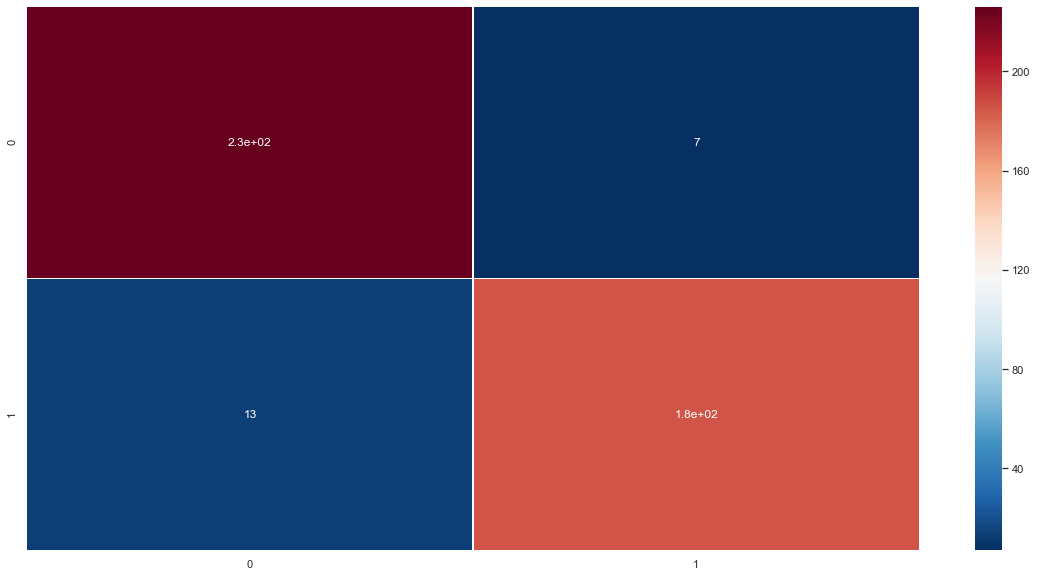

In [69]:
results = confusion_matrix(pred_tre, yt_test) 
  
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(pred_tre, yt_test))
print('\nReport : \n')
print(classification_report(pred_tre, yt_test)) 
sns.heatmap(results,annot=True,cmap = "RdBu_r", linewidths=.5)


# Comparing Accuracies

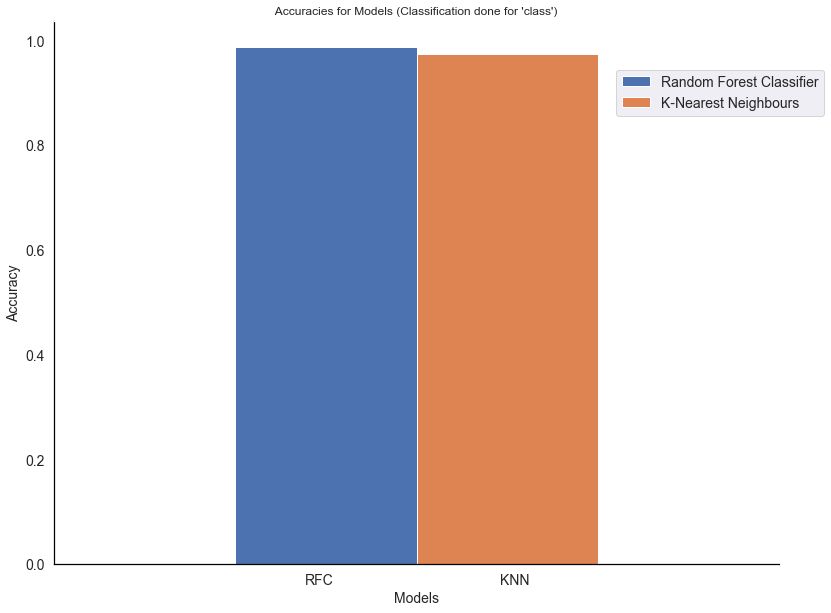

In [59]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Making a dataframe of the accuracies
a = {'Random Forest Classifier': [0.988399071925754], 'K-Nearest Neighbours': [0.974477958236659]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['RFC', 'KNN']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for Models (Classification done for \'class\') ')
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

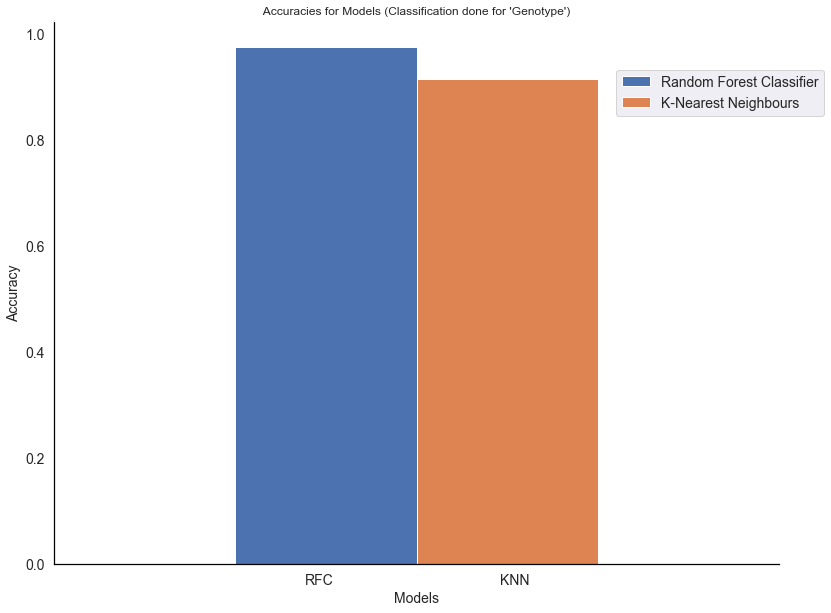

In [60]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Making a dataframe of the accuracies
a = {'Random Forest Classifier': [0.9767981438515081], 'K-Nearest Neighbours': [0.9164733178654292]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['RFC', 'KNN']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for Models (Classification done for \'Genotype\') ')
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

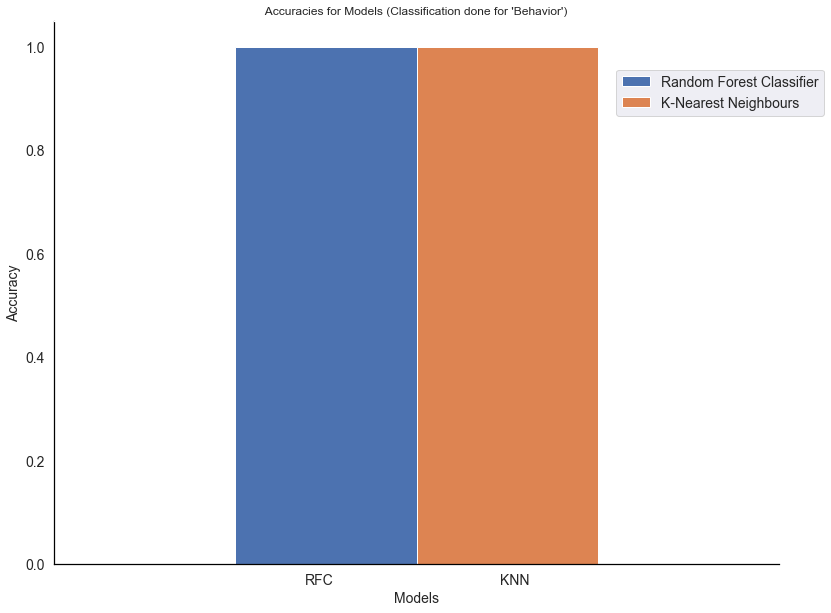

In [61]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Making a dataframe of the accuracies
a = {'Random Forest Classifier': [1.0], 'K-Nearest Neighbours': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['RFC', 'KNN']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for Models (Classification done for \'Behavior\') ')
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

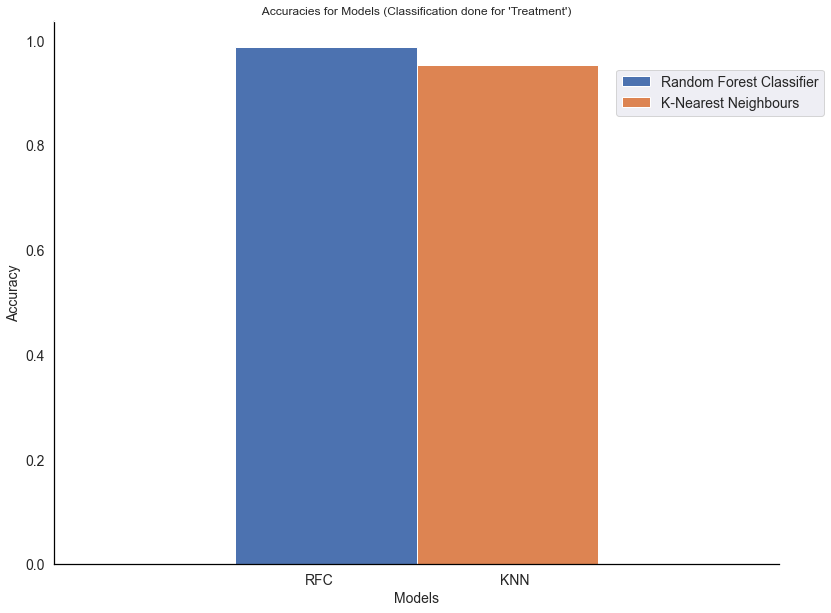

In [62]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Making a dataframe of the accuracies
a = {'Random Forest Classifier': [0.988399071925754], 'K-Nearest Neighbours': [0.9535962877030162]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['RFC', 'KNN']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for Models (Classification done for \'Treatment\') ')
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')